# Tree Census Cherry Trees

In [2]:
import pandas as pd

In [18]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [19]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# create a dataframe from /Users/laura.kukkonen/Documents/CherryTrees/2015_Street_Tree_Census_-_Tree_Data_20240322.csv
df = pd.read_csv('/Users/laura.kukkonen/Documents/CherryTrees/2015_Street_Tree_Census_-_Tree_Data_20240322.csv')

In [4]:
df

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,157920,323297,08/18/2015,3,0,OnCurb,Alive,Good,Prunus serotina,black cherry,...,4138501,New York,40.756908,-73.756535,1.051701e+06,215132.2814,23.0,138501.0,4161036.0,4.074920e+09
1,178894,222330,08/26/2015,4,0,OnCurb,Alive,Good,Prunus serotina,black cherry,...,3043900,New York,40.697919,-73.908307,1.009676e+06,193560.5555,37.0,439.0,3077424.0,3.033790e+09
2,203899,218268,09/05/2015,3,0,OnCurb,Alive,Good,Prunus,cherry,...,3044900,New York,40.715942,-73.934013,1.002543e+06,200120.5562,34.0,449.0,3070492.0,3.029270e+09
3,148998,315038,08/15/2015,4,0,OnCurb,Alive,Good,Prunus,cherry,...,4094700,New York,40.785295,-73.841521,1.028137e+06,225420.7110,19.0,925.0,4098463.0,4.040930e+09
4,142765,223197,08/13/2015,2,0,OnCurb,Alive,Good,Prunus serotina,black cherry,...,3013700,New York,40.670619,-73.985909,9.881590e+05,183601.2723,39.0,137.0,3021856.0,3.009980e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34769,182428,413384,08/28/2015,9,0,OnCurb,Alive,Good,Prunus,cherry,...,5017012,New York,40.555569,-74.170760,9.367991e+05,141731.4735,51.0,17012.0,5130810.0,5.056100e+09
34770,174002,408883,08/25/2015,7,0,OnCurb,Alive,Fair,Prunus,cherry,...,5007000,New York,40.583082,-74.085256,9.605686e+05,151720.4824,50.0,11201.0,5129386.0,5.034720e+09
34771,177505,202326,08/26/2015,4,0,OnCurb,Alive,Good,Prunus,cherry,...,3114600,New York,40.678693,-73.893788,1.013710e+06,186560.4826,37.0,1146.0,3083162.0,3.036630e+09
34772,196834,316924,09/02/2015,15,0,OnCurb,Alive,Good,Prunus,cherry,...,4089200,New York,40.661684,-73.845403,1.027141e+06,180383.3913,32.0,892.0,4292604.0,4.139670e+09


In [5]:
# show and count all unique values in the 'spc_common' column
df['spc_common'].value_counts()

spc_common
cherry                    29279
'Schubert' chokecherry     4888
black cherry                607
Name: count, dtype: int64

In [6]:
#delete other than just cherry trees
df = df[df['spc_common'] == 'cherry']

In [7]:
df

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
2,203899,218268,09/05/2015,3,0,OnCurb,Alive,Good,Prunus,cherry,...,3044900,New York,40.715942,-73.934013,1.002543e+06,200120.5562,34.0,449.0,3070492.0,3.029270e+09
3,148998,315038,08/15/2015,4,0,OnCurb,Alive,Good,Prunus,cherry,...,4094700,New York,40.785295,-73.841521,1.028137e+06,225420.7110,19.0,925.0,4098463.0,4.040930e+09
6,208894,301957,09/08/2015,4,0,OnCurb,Alive,Good,Prunus,cherry,...,4009700,New York,40.775104,-73.915162,1.007747e+06,221679.6079,22.0,97.0,4018046.0,4.008530e+09
7,182279,413416,08/28/2015,4,0,OnCurb,Alive,Fair,Prunus,cherry,...,5017012,New York,40.556748,-74.170153,9.369686e+05,142160.5687,51.0,17012.0,5074641.0,5.056110e+09
8,184736,504296,08/29/2015,2,0,OnCurb,Alive,Good,Prunus,cherry,...,2037900,New York,40.853082,-73.898803,1.012245e+06,250094.4579,15.0,379.0,2013365.0,2.031440e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34769,182428,413384,08/28/2015,9,0,OnCurb,Alive,Good,Prunus,cherry,...,5017012,New York,40.555569,-74.170760,9.367991e+05,141731.4735,51.0,17012.0,5130810.0,5.056100e+09
34770,174002,408883,08/25/2015,7,0,OnCurb,Alive,Fair,Prunus,cherry,...,5007000,New York,40.583082,-74.085256,9.605686e+05,151720.4824,50.0,11201.0,5129386.0,5.034720e+09
34771,177505,202326,08/26/2015,4,0,OnCurb,Alive,Good,Prunus,cherry,...,3114600,New York,40.678693,-73.893788,1.013710e+06,186560.4826,37.0,1146.0,3083162.0,3.036630e+09
34772,196834,316924,09/02/2015,15,0,OnCurb,Alive,Good,Prunus,cherry,...,4089200,New York,40.661684,-73.845403,1.027141e+06,180383.3913,32.0,892.0,4292604.0,4.139670e+09


In [8]:
#show all column names
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [9]:
#show if there are more than one unique values in 'latitude' column
df['latitude'].nunique()

29257

In [10]:
#group by postcode and count the number of trees in each postcode
df.groupby('postcode')['tree_id'].count()

postcode
10001      1
10002     78
10003      9
10007      6
10009     36
        ... 
11436    133
11691    609
11692    173
11693     58
11694    269
Name: tree_id, Length: 173, dtype: int64

In [11]:
#arrange the count of trees in descending order
df.groupby('postcode')['tree_id'].count().sort_values(ascending=False)

postcode
11208    917
11357    796
10312    784
10314    729
11434    698
        ... 
10023      4
10036      3
10039      2
11005      1
10001      1
Name: tree_id, Length: 173, dtype: int64

In [12]:
#count the number of trees in each borough
df['borough'].value_counts()

borough
Queens           13497
Brooklyn          5706
Staten Island     5115
Bronx             4092
Manhattan          869
Name: count, dtype: int64

In [13]:
#make a new dataframe with the number of trees in each postcode and save it as a csv file cherrytreecount.csv
df.groupby('postcode')['tree_id'].count().to_csv('/Users/laura.kukkonen/Documents/CherryTrees/cherrytreecount.csv')

In [14]:
#create a new dataframe with just address, latitude and longitude columns
df2 = df[['address', 'latitude', 'longitude']]

In [15]:
#save the new dataframe to a csv file called cherrytreeplaces.csv
df2.to_csv('/Users/laura.kukkonen/Documents/CherryTrees/cherrytreeplaces.csv', index=False)

In [16]:
df2.head(20)

,address,latitude,longitude
2,1 REWE STREET,40.715942,-73.934013
3,126-011 15 AVENUE,40.785295,-73.841521
6,23-022 28 STREET,40.775104,-73.915162
7,650 BARLOW AVENUE,40.556748,-74.170153
8,2107 TIEBOUT AVENUE,40.853082,-73.898803
9,21-081 24 STREET,40.779495,-73.914916
10,49-012 DITMARS BOULEVARD,40.768460,-73.899967
11,503 EAST 182 STREET,40.853479,-73.893622
12,389 AVENUE X,40.590660,-73.968498
13,18-019 21 DRIVE,40.782681,-73.918469


# Blooming day data DC

In [17]:
#read an excel file called CherryBlossomdayDC.xlsx
df2 = pd.read_excel('CherryBlossomdayDC.xlsx')
df2

,Year,Yoshino peak bloom day,20 year rolling average,10 year rolling average
0,1922,97,NaN,NaN
1,1923,99,NaN,NaN
2,1924,104,NaN,NaN
3,1925,86,NaN,NaN
4,1926,101,NaN,NaN
...,...,...,...,...
96,2018,95,91.00,91.2
97,2019,91,90.80,91.2
98,2020,80,90.95,90.2
99,2021,87,90.50,90.1


In [22]:
%%R
#fetch a library that can open excel files
library(readxl)
#open CherryBlossomdayDC.xlsx
df2 <- read_excel('CherryBlossomdayDC.xlsx')
#open df2
df2


# A tibble: 101 × 4
    Year `Yoshino peak bloom day` 20 year rolling avera…¹ 10 year rolling aver…²
   <dbl>                    <dbl>                   <dbl>                  <dbl>
 1  1922                       97                      NA                   NA  
 2  1923                       99                      NA                   NA  
 3  1924                      104                      NA                   NA  
 4  1925                       86                      NA                   NA  
 5  1926                      101                      NA                   NA  
 6  1927                       79                      NA                   NA  
 7  1928                       99                      NA                   NA  
 8  1929                       90                      NA                   NA  
 9  1930                       91                      NA                   NA  
10  1931                      101                      NA                   94.7
# ℹ 91 m

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 20 rows containing missing values (`geom_line()`). 

R[write to console]: 2: Removed 9 rows containing missing values (`geom_line()`). 



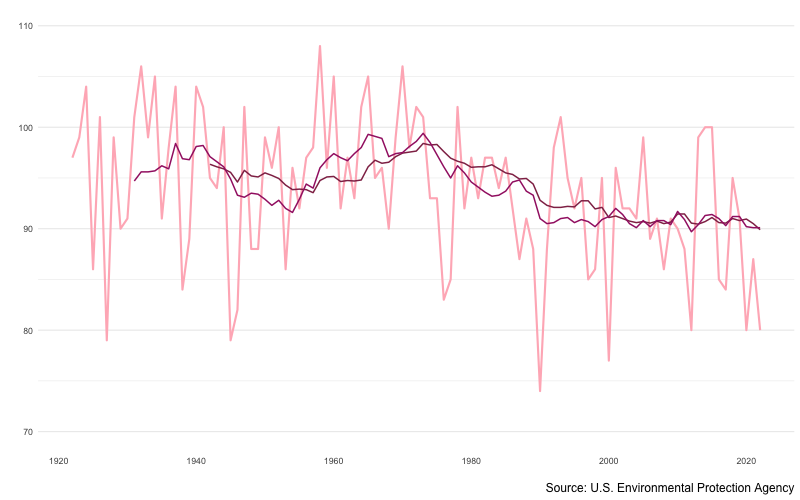

In [99]:
%%R -w 800 -h 500

#use ggplot to make a chart with a bar from `Yoshino peak bloom day` and a line from 20 year rolling avera…¹ and 10 year rolling aver…². The y-axis should start from 75
library(ggplot2)
ggplot(df2, aes(x=Year, y=`Yoshino peak bloom day`)) +
  geom_line(aes(y=`Yoshino peak bloom day`, group=1), color='lightpink', size = 1) +
  geom_line(aes(y=`20 year rolling average`, group=1), color='#913055', size = 0.7) +
  geom_line(aes(y=`10 year rolling average`, group=1), color='#A32372', size = 0.7) +
  scale_y_continuous(limits=c(70, 110)) +
  theme_minimal() +
  #remove the label from the y-axis
    ylab('') +
    xlab('') +
    #show only round 10 year intervals on the x-axis
    scale_x_continuous(breaks=seq(1920, 2020, 20)) +
    labs(caption='Source: U.S. Environmental Protection Agency') +
    #take away the vertical grid
    theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank()) +
    #set the font of the caption to 12
    theme(plot.caption = element_text(size=12))




    #save the chart as a svg file
#ggsave('/Users/laura.kukkonen/Documents/CherryTrees/cherryblossom.svg', width=8, height=6)


In [124]:
%%R -w 800 -h 500

library(ggplot2)

ggplot(df2, aes(x=Year)) +
  geom_line(aes(y=`Yoshino peak bloom day`, color='Yoshino Peak Bloom Day'), size=1) +
  geom_line(aes(y=`20 year rolling average`, color='20 Year Rolling Average'), size=0.7) +
  geom_line(aes(y=`10 year rolling average`, color='10 Year Rolling Average'), size=0.7) +
  scale_color_manual(values=c('Yoshino Peak Bloom Day'='lightpink', '20 Year Rolling Average'='#913055', '10 Year Rolling Average'='#A32372')) +
  scale_y_continuous(limits=c(70, 110)) +
  theme_minimal() +
  labs(y='', x='', caption='Source: U.S. Environmental Protection Agency', 
       color="") +
  scale_x_continuous(breaks=seq(1920, 2020, 20)) +
  theme(panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        plot.caption = element_text(size=12),
        legend.position = "top",
        legend.direction = "horizontal",
        legend.justification = "left", 
        legend.box.just = "left") 
ggsave('Yoshino peak bloom day.svg', width=8, height=5)

In addition: Warning messages:
1: Removed 20 rows containing missing values (`geom_line()`). 
2: Removed 9 rows containing missing values (`geom_line()`). 


In [89]:
%%R
#export the created chart as a png file
ggsave('Yoshino peak bloom day.svg', width=8, height=5)

In addition: Warning messages:
1: Removed 20 rows containing missing values (`geom_line()`). 
2: Removed 9 rows containing missing values (`geom_line()`). 


In [125]:
%%R -w 450 -h 600

library(ggplot2)

ggplot(df2, aes(x=Year)) +
  geom_line(aes(y=`Yoshino peak bloom day`, color='Yoshino Peak Bloom Day'), size=1) +
  geom_line(aes(y=`20 year rolling average`, color='20 Year Rolling Average'), size=0.7) +
  geom_line(aes(y=`10 year rolling average`, color='10 Year Rolling Average'), size=0.7) +
  scale_color_manual(values=c('Yoshino Peak Bloom Day'='lightpink', '20 Year Rolling Average'='#913055', '10 Year Rolling Average'='#A32372')) +
  scale_y_continuous(limits=c(70, 110)) +
  theme_minimal() +
  labs(y='', x='', caption='Source: U.S. Environmental Protection Agency', 
       color="") +
  scale_x_continuous(breaks=seq(1920, 2020, 20)) +
  theme(panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        plot.caption = element_text(size=12),
                legend.position = "top",
        legend.direction = "horizontal",
        legend.justification = "left", 
        legend.box.just = "left") +
    scale_x_continuous(limits=c(1940, 2020))

ggsave('Mobile peak bloom day.svg', width=4.5, height=6)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Error in `ggsave()`:
! Unknown graphics device "ai"
Run `rlang::last_trace()` to see where the error occurred.

Error in ggsave("Mobile peak bloom day.ai", width = 4.5, height = 6) :


RInterpreterError: Failed to parse and evaluate line '\nlibrary(ggplot2)\n\nggplot(df2, aes(x=Year)) +\n  geom_line(aes(y=`Yoshino peak bloom day`, color=\'Yoshino Peak Bloom Day\'), size=1) +\n  geom_line(aes(y=`20 year rolling average`, color=\'20 Year Rolling Average\'), size=0.7) +\n  geom_line(aes(y=`10 year rolling average`, color=\'10 Year Rolling Average\'), size=0.7) +\n  scale_color_manual(values=c(\'Yoshino Peak Bloom Day\'=\'lightpink\', \'20 Year Rolling Average\'=\'#913055\', \'10 Year Rolling Average\'=\'#A32372\')) +\n  scale_y_continuous(limits=c(70, 110)) +\n  theme_minimal() +\n  labs(y=\'\', x=\'\', caption=\'Source: U.S. Environmental Protection Agency\', \n       color="") +\n  scale_x_continuous(breaks=seq(1920, 2020, 20)) +\n  theme(panel.grid.major.x = element_blank(),\n        panel.grid.minor.x = element_blank(),\n        plot.caption = element_text(size=12),\n                legend.position = "top",\n        legend.direction = "horizontal",\n        legend.justification = "left", \n        legend.box.just = "left") +\n    scale_x_continuous(limits=c(1940, 2020))\n\nggsave(\'Mobile peak bloom day.ai\', width=4.5, height=6)\n'.
R error message: 'Error in ggsave("Mobile peak bloom day.ai", width = 4.5, height = 6) :'